# Data Analytics Project - Backtesting Model Predictions

# ESCORTS STOCK MODELS EVALUATION

---

# 1. Importing Required Modules

In [1]:
import pandas as pd

# 2. Get required datasets

## 2.1. Get the orders dataset of ESCORTS

In [2]:
orders_df = pd.read_csv('../Preprocess/Pair2/Pair2_orders.csv')
orders_df.head()

,Date,BEML_Close,ESCORTS_Close,Spread,zscore,Orders
0,2018-08-06,909.099976,880.049988,29.049988,1.821236,SHORT
1,2018-08-07,868.599976,873.700012,-5.100037,0.672698,FLAT
2,2018-08-08,825.150024,876.500000,-51.349976,-0.882785,GET_OUT_OF_POSITION
3,2018-08-09,810.150024,878.750000,-68.599976,-1.462939,FLAT
4,2018-08-10,807.750000,865.250000,-57.500000,-1.089624,FLAT


In [3]:
orders_df.tail()

,Date,BEML_Close,ESCORTS_Close,Spread,zscore,Orders
54,2018-10-29,561.150024,591.450012,-30.299988,-0.174830,FLAT
55,2018-10-30,585.650024,603.950012,-18.299988,0.228756,FLAT
56,2018-10-31,587.250000,627.000000,-39.750000,-0.492654,FLAT
57,2018-11-01,632.400024,674.450012,-42.049988,-0.570007,FLAT
58,2018-11-02,688.900024,676.000000,12.900024,1.278078,FLAT


## 2.2. Visualize the orders

Text(0, 0.5, 'zscore')

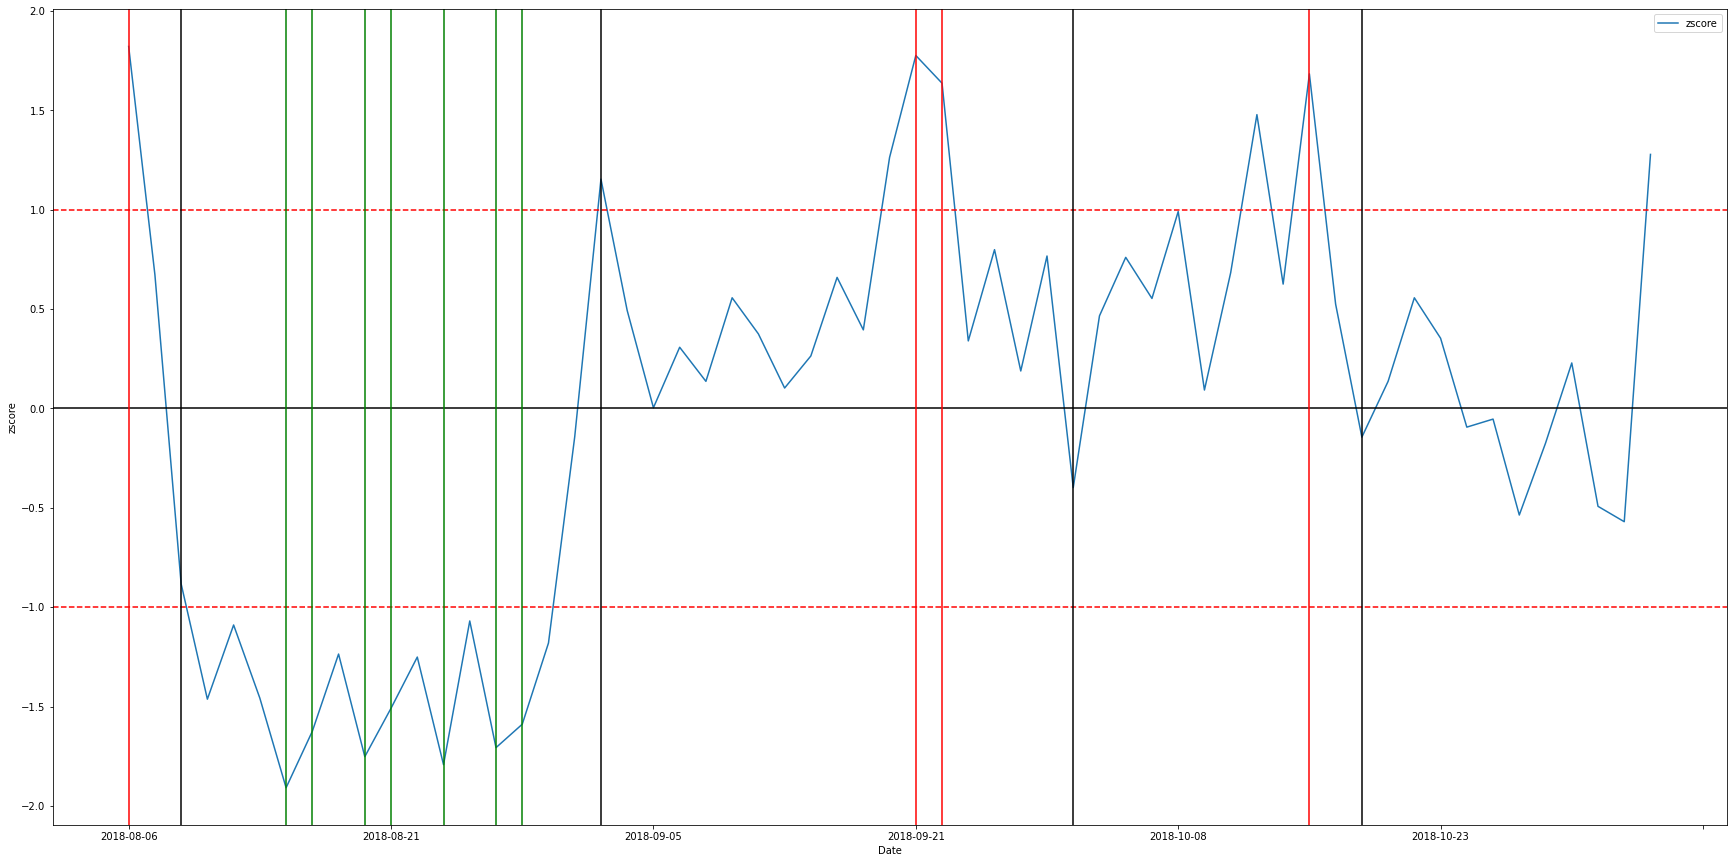

In [4]:
# Plotting the zscore of the Spread
orders_plt = orders_df.plot(x='Date', y='zscore', figsize=(30,15))

# Plotting the lines at mean, 1 and 2 std. dev.
orders_plt.axhline(0, c='black')
orders_plt.axhline(1, c='red', ls = "--")
orders_plt.axhline(-1, c='red', ls = "--")

# Extracting orders
Orders = orders_df['Orders']

# Plot vertical lines where orders are placed
for order in range(len(Orders)):
    
    if Orders[order] != "FLAT":
        
        # GREEN line for a long position
        if Orders[order] == "LONG":
            orders_plt.axvline(x=order, c = "green")
        
        # RED line for a short position
        elif Orders[order] == "SHORT":
            orders_plt.axvline(x=order, c = "red")
        
        # BLACK line for getting out of all positions at that point
        else:
            orders_plt.axvline(x=order, c = "black")

orders_plt.set_ylabel("zscore")

__In the figure above:__
- __Blue line__ - zscore of the Spread
- __Black horizontal line__ at 0 - Mean
- __Red dotted horizontal lines__ - at +1 and -1 standard deviations
- __Green vertical line__ - represents long position taken on that day
- __Red vertical line__ - represents short position taken on that day
- __Black vertical line__ - represents getting out of all open positions till that point


## 2.3. Get the predicitions dataset of BAJAJ-AUTO

In [5]:
predictions = pd.read_csv("../Models/Pair2/Escorts_predicitions.csv")
predictions.head()

,Date,Actual_Close,Linear_regression_Close,ARIMA_Close,LSTM_Close
0,2018-08-06,880.049988,894.957322,814.415519,NaN
1,2018-08-07,873.700012,896.301668,807.619558,NaN
2,2018-08-08,876.500000,897.646014,816.193006,NaN
3,2018-08-09,878.750000,898.990361,799.530341,NaN
4,2018-08-10,865.250000,896.179214,790.553107,NaN


In [6]:
predictions = predictions.dropna()
predictions.head()

,Date,Actual_Close,Linear_regression_Close,ARIMA_Close,LSTM_Close
10,2018-08-21,899.549988,901.434146,788.404502,793.65204
11,2018-08-23,886.549988,904.122838,771.156251,788.27490
12,2018-08-24,891.650024,901.311692,781.207008,780.33386
13,2018-08-27,888.599976,902.656038,777.475221,769.18164
14,2018-08-28,895.349976,904.000384,782.814349,756.30180


## 2.4 Visualize the predictions by different models

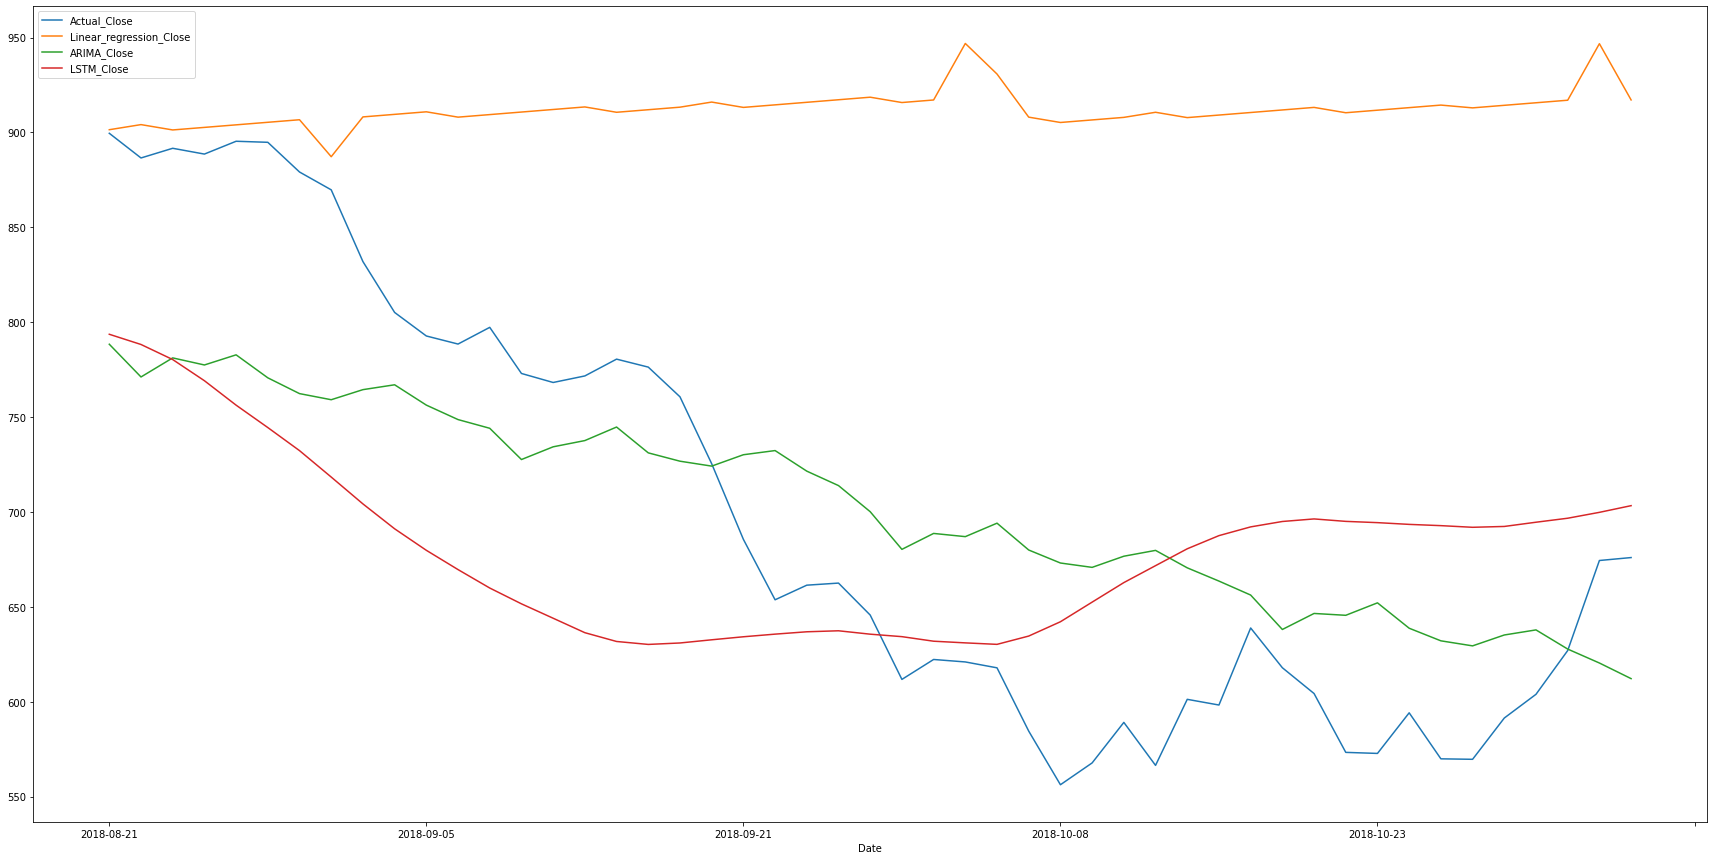

In [7]:
predictions.plot(x='Date', y=['Actual_Close', 'Linear_regression_Close', 'ARIMA_Close', 'LSTM_Close'], figsize=(30,15))

__In the figure above:__
- __x-axis__ - Date
- __y-axis__ - Price in rupees
- __Blue line__ - Actual data in the time period of correlation
- __Orange line__ - Linear Regression predictions for the time period
- __Red line__ - LSTM predictions for the time period
- __Green line__ - ARIMA predictions for the time period


---

# 3. Set parameters of trading

In [8]:
CAPITAL = 1000000
RISK = 20000 # Max risk allowed per trade (2% of capital)

- CAPITAL - Total amout of money willing to be spent.
- RISK - Amount to spend per trade (maximum).
- OPEN POSITION - Buy/Short shares of stock worth 20000.
- CLOSE POSITION - Buy/Sell shares to consolidate open positions and take profit/loss.
- TRADE_BOOK - Keeps track of all open positions.
- For the purpose of this experiment, we assume no brokerage costs, which is a fair assumption as many brokers (such as zerodha, robinhood, sharekhan, etc.) offer equity delivery at no cost.

---

# 4. Evaluate all individual orders

## 4.1. Display all orders which are not *FLAT*

In [9]:
not_flat_orders = orders_df[orders_df['Orders'] != 'FLAT']
not_flat_orders

,Date,BEML_Close,ESCORTS_Close,Spread,zscore,Orders
0,2018-08-06,909.099976,880.049988,29.049988,1.821236,SHORT
2,2018-08-08,825.150024,876.500000,-51.349976,-0.882785,GET_OUT_OF_POSITION
6,2018-08-14,793.950012,875.799988,-81.849976,-1.908565,LONG
7,2018-08-16,796.099976,869.500000,-73.400024,-1.624375,LONG
9,2018-08-20,814.000000,891.200012,-77.200012,-1.752177,LONG
10,2018-08-21,829.599976,899.549988,-69.950012,-1.508344,LONG
12,2018-08-24,813.250000,891.650024,-78.400024,-1.792536,LONG
14,2018-08-28,819.500000,895.349976,-75.849976,-1.706772,LONG
15,2018-08-29,822.450012,894.799988,-72.349976,-1.589060,LONG
18,2018-09-03,841.150024,831.950012,9.200012,1.153639,GET_OUT_OF_POSITION


In [10]:
not_flat_orders = not_flat_orders.set_index('Date').reset_index()
not_flat_orders

,Date,BEML_Close,ESCORTS_Close,Spread,zscore,Orders
0,2018-08-06,909.099976,880.049988,29.049988,1.821236,SHORT
1,2018-08-08,825.150024,876.500000,-51.349976,-0.882785,GET_OUT_OF_POSITION
2,2018-08-14,793.950012,875.799988,-81.849976,-1.908565,LONG
3,2018-08-16,796.099976,869.500000,-73.400024,-1.624375,LONG
4,2018-08-20,814.000000,891.200012,-77.200012,-1.752177,LONG
5,2018-08-21,829.599976,899.549988,-69.950012,-1.508344,LONG
6,2018-08-24,813.250000,891.650024,-78.400024,-1.792536,LONG
7,2018-08-28,819.500000,895.349976,-75.849976,-1.706772,LONG
8,2018-08-29,822.450012,894.799988,-72.349976,-1.589060,LONG
9,2018-09-03,841.150024,831.950012,9.200012,1.153639,GET_OUT_OF_POSITION


## 4.2 Flip all orders

In [11]:
def flip_orders(orders):
    
    flipped_orders = []
    
    for order in orders:
        if order == 'SHORT':
            flipped_orders.append('LONG')
        elif order == 'LONG':
            flipped_orders.append('SHORT')
        else:
            flipped_orders.append(order)
    
    return flipped_orders


In [12]:
not_flat_orders['Orders'] = flip_orders(not_flat_orders['Orders'])
not_flat_orders

,Date,BEML_Close,ESCORTS_Close,Spread,zscore,Orders
0,2018-08-06,909.099976,880.049988,29.049988,1.821236,LONG
1,2018-08-08,825.150024,876.500000,-51.349976,-0.882785,GET_OUT_OF_POSITION
2,2018-08-14,793.950012,875.799988,-81.849976,-1.908565,SHORT
3,2018-08-16,796.099976,869.500000,-73.400024,-1.624375,SHORT
4,2018-08-20,814.000000,891.200012,-77.200012,-1.752177,SHORT
5,2018-08-21,829.599976,899.549988,-69.950012,-1.508344,SHORT
6,2018-08-24,813.250000,891.650024,-78.400024,-1.792536,SHORT
7,2018-08-28,819.500000,895.349976,-75.849976,-1.706772,SHORT
8,2018-08-29,822.450012,894.799988,-72.349976,-1.589060,SHORT
9,2018-09-03,841.150024,831.950012,9.200012,1.153639,GET_OUT_OF_POSITION


- As ESCORTS is the stock with the lower price value, in pair trading we need to take the position opposite to the one we take on the larger stock. Hence the positions to take are flipped.

## 4.3. Get predictions of dates where orders are placed

### 4.3.1. Filter rows in predictions to only include dates where orders are placed

In [13]:
not_flat_orders = not_flat_orders.set_index('Date')
not_flat_orders

,BEML_Close,ESCORTS_Close,Spread,zscore,Orders
Date,,,,,
2018-08-06,909.099976,880.049988,29.049988,1.821236,LONG
2018-08-08,825.150024,876.500000,-51.349976,-0.882785,GET_OUT_OF_POSITION
2018-08-14,793.950012,875.799988,-81.849976,-1.908565,SHORT
2018-08-16,796.099976,869.500000,-73.400024,-1.624375,SHORT
2018-08-20,814.000000,891.200012,-77.200012,-1.752177,SHORT
2018-08-21,829.599976,899.549988,-69.950012,-1.508344,SHORT
2018-08-24,813.250000,891.650024,-78.400024,-1.792536,SHORT
2018-08-28,819.500000,895.349976,-75.849976,-1.706772,SHORT
2018-08-29,822.450012,894.799988,-72.349976,-1.589060,SHORT


In [14]:
predicitions = predictions.set_index('Date')
predicitions

,Actual_Close,Linear_regression_Close,ARIMA_Close,LSTM_Close
Date,,,,
2018-08-21,899.549988,901.434146,788.404502,793.65204
2018-08-23,886.549988,904.122838,771.156251,788.27490
2018-08-24,891.650024,901.311692,781.207008,780.33386
2018-08-27,888.599976,902.656038,777.475221,769.18164
2018-08-28,895.349976,904.000384,782.814349,756.30180
2018-08-29,894.799988,905.344730,770.705325,744.49817
2018-08-30,879.150024,906.689077,762.385438,732.34247
2018-08-31,869.750000,887.214097,759.164648,718.41223
2018-09-03,831.950012,908.179237,764.475555,704.27080


In [15]:
orders_predictions = predicitions.join(not_flat_orders)
orders_predictions = orders_predictions.dropna()
orders_predictions

,Actual_Close,Linear_regression_Close,ARIMA_Close,LSTM_Close,BEML_Close,ESCORTS_Close,Spread,zscore,Orders
Date,,,,,,,,,
2018-08-21,899.549988,901.434146,788.404502,793.65204,829.599976,899.549988,-69.950012,-1.508344,SHORT
2018-08-24,891.650024,901.311692,781.207008,780.33386,813.250000,891.650024,-78.400024,-1.792536,SHORT
2018-08-28,895.349976,904.000384,782.814349,756.30180,819.500000,895.349976,-75.849976,-1.706772,SHORT
2018-08-29,894.799988,905.344730,770.705325,744.49817,822.450012,894.799988,-72.349976,-1.589060,SHORT
2018-09-03,831.950012,908.179237,764.475555,704.27080,841.150024,831.950012,9.200012,1.153639,GET_OUT_OF_POSITION
2018-09-21,685.599976,913.189260,730.175960,634.26310,713.299988,685.599976,27.700012,1.775833,LONG
2018-09-24,653.750000,914.533606,732.371790,635.65155,677.299988,653.750000,23.549988,1.636259,LONG
2018-10-01,622.299988,917.099845,688.712636,631.92500,585.349976,622.299988,-36.950012,-0.398484,GET_OUT_OF_POSITION
2018-10-15,598.299988,909.155819,663.606947,687.55740,623.250000,598.299988,24.950012,1.683345,LONG


### 4.3.2 Remove columns in orders and predictions dataframe

In [16]:
orders_predictions = orders_predictions.drop(columns=['BEML_Close', 'ESCORTS_Close', 'Spread', 'zscore'])
orders_predictions

,Actual_Close,Linear_regression_Close,ARIMA_Close,LSTM_Close,Orders
Date,,,,,
2018-08-21,899.549988,901.434146,788.404502,793.65204,SHORT
2018-08-24,891.650024,901.311692,781.207008,780.33386,SHORT
2018-08-28,895.349976,904.000384,782.814349,756.30180,SHORT
2018-08-29,894.799988,905.344730,770.705325,744.49817,SHORT
2018-09-03,831.950012,908.179237,764.475555,704.27080,GET_OUT_OF_POSITION
2018-09-21,685.599976,913.189260,730.175960,634.26310,LONG
2018-09-24,653.750000,914.533606,732.371790,635.65155,LONG
2018-10-01,622.299988,917.099845,688.712636,631.92500,GET_OUT_OF_POSITION
2018-10-15,598.299988,909.155819,663.606947,687.55740,LONG


### 4.3.3 Create function to evaluate orders

In [17]:
def evaluate_orders(orders_df):
    
    actual_profits = []
    LR_profits = []
    ARIMA_profits = []
    LSTM_profits = []
    shares = []
    
    num_orders = len(orders_df["Orders"])
    
    for i in range(num_orders):
        
        if i == num_orders - 1:
            actual_profits.append(0)
            LR_profits.append(0)
            ARIMA_profits.append(0)
            LSTM_profits.append(0)
            shares.append(0)
            break
        
        position = orders_df['Orders'][i]
        close = orders_df['Actual_Close'][i]
        LR_close = orders_df['Linear_regression_Close'][i]
        ARIMA_close = orders_df['ARIMA_Close'][i]
        LSTM_close = orders_df['LSTM_Close'][i]
        
        print()
        
        print("ORDER: ", i, close, LR_close, ARIMA_close, LSTM_close, position)
        
        if position == 'LONG' or position == 'SHORT':
            
            no_of_shares = 20000//close
            
            for j in range(i+1, num_orders):
                
                if (j == num_orders - 1) or orders_df['Orders'][j] == 'GET_OUT_OF_POSITION':
                    
                    actual_profit = orders_df['Actual_Close'][j] - orders_df['Actual_Close'][i]
                    LR_profit = orders_df['Linear_regression_Close'][j] - orders_df['Linear_regression_Close'][i]
                    ARIMA_profit = orders_df['ARIMA_Close'][j] - orders_df['ARIMA_Close'][i]
                    LSTM_profit = orders_df['LSTM_Close'][j] - orders_df['LSTM_Close'][i]
                    
                    actual_profit *= no_of_shares
                    LR_profit *= no_of_shares
                    ARIMA_profit *= no_of_shares
                    LSTM_profit  *= no_of_shares
                    
                    if position == 'SHORT':
                        actual_profit *= -1
                        LR_profit *= -1
                        ARIMA_profit *= -1
                        LSTM_profit *= -1
                    
                    print('number of shares: ', no_of_shares)
                    print('actual profit: ', actual_profit)
                    print('LR profit: ', LR_profit)
                    print('ARIMA profit: ', ARIMA_profit)
                    print('LSTM profit: ', LSTM_profit)
                    
                    shares.append(no_of_shares)
                    actual_profits.append(actual_profit)
                    LR_profits.append(LR_profit)
                    ARIMA_profits.append(ARIMA_profit)
                    LSTM_profits.append(LSTM_profit)
                    
                    break
        else:
            actual_profits.append(0)
            LR_profits.append(0)
            ARIMA_profits.append(0)
            LSTM_profits.append(0)
            shares.append(0)
        
        print()
    
    return actual_profits, LR_profits, ARIMA_profits, LSTM_profits, shares
                    

In [18]:
actual_profits, LR_profits, ARIMA_profits, LSTM_profits, shares = evaluate_orders(orders_predictions)


ORDER:  0 899.5499877929688 901.4341455007087 788.4045020182066 793.65204 SHORT
number of shares:  22.0
actual profit:  1487.199462890625
LR profit:  -148.3920055507915
ARIMA profit:  526.4368337787967
LSTM profit:  1966.387280000001


ORDER:  1 891.6500244140625 901.3116917611333 781.2070082694368 780.33386 SHORT
number of shares:  22.0
actual profit:  1313.4002685546875
LR profit:  -151.08598782145168
ARIMA profit:  368.0919713058604
LSTM profit:  1673.387319999999


ORDER:  2 895.3499755859375 904.0003841763246 782.814348530272 756.3018 SHORT
number of shares:  22.0
actual profit:  1394.7991943359375
LR profit:  -91.9347546872425
ARIMA profit:  403.4534570442361
LSTM profit:  1144.6819999999989


ORDER:  3 894.7999877929688 905.3447303840076 770.7053251025823 744.4981700000001 SHORT
number of shares:  22.0
actual profit:  1382.699462890625
LR profit:  -62.35913811821706
ARIMA profit:  137.0549416350616
LSTM profit:  885.0021400000014


ORDER:  4 831.9500122070312 908.1792366621083 

In [19]:
actual_profits

[1487.199462890625,
 1313.4002685546875,
 1394.7991943359375,
 1382.699462890625,
 0,
 -1835.6996459960938,
 -943.5003662109375,
 0,
 648.4508056640625,
 0]

In [20]:
LR_profits

[-148.3920055507915,
 -151.08598782145168,
 -91.9347546872425,
 -62.35913811821706,
 0,
 113.40696161566632,
 76.98716027022215,
 0,
 88.72684970323087,
 0]

In [21]:
LSTM_profits

[1966.387280000001,
 1673.387319999999,
 1144.6819999999989,
 885.0021400000014,
 0,
 -67.80490000000157,
 -111.79650000000265,
 0,
 245.79719999999975,
 0]

In [22]:
shares

[22.0, 22.0, 22.0, 22.0, 0, 29.0, 30.0, 0, 33.0, 0]

In [23]:
ARIMA_profits

[526.4368337787967,
 368.0919713058604,
 403.4534570442361,
 137.0549416350616,
 0,
 -1202.4363950899105,
 -1309.7746371796154,
 0,
 -841.5157112384244,
 0]

### 4.3.4 Adding evaluated orders to dataframe

In [24]:
orders_predictions

,Actual_Close,Linear_regression_Close,ARIMA_Close,LSTM_Close,Orders
Date,,,,,
2018-08-21,899.549988,901.434146,788.404502,793.65204,SHORT
2018-08-24,891.650024,901.311692,781.207008,780.33386,SHORT
2018-08-28,895.349976,904.000384,782.814349,756.30180,SHORT
2018-08-29,894.799988,905.344730,770.705325,744.49817,SHORT
2018-09-03,831.950012,908.179237,764.475555,704.27080,GET_OUT_OF_POSITION
2018-09-21,685.599976,913.189260,730.175960,634.26310,LONG
2018-09-24,653.750000,914.533606,732.371790,635.65155,LONG
2018-10-01,622.299988,917.099845,688.712636,631.92500,GET_OUT_OF_POSITION
2018-10-15,598.299988,909.155819,663.606947,687.55740,LONG


In [25]:
orders_predictions['Shares'] = shares
orders_predictions['Actual_profit'] = actual_profits
orders_predictions['Linear_regression_profit'] = LR_profits
orders_predictions['ARIMA_profit'] = ARIMA_profits
orders_predictions['LSTM_profit'] = LSTM_profits

In [26]:
orders_predictions

,Actual_Close,Linear_regression_Close,ARIMA_Close,LSTM_Close,Orders,Shares,Actual_profit,Linear_regression_profit,ARIMA_profit,LSTM_profit
Date,,,,,,,,,,
2018-08-21,899.549988,901.434146,788.404502,793.65204,SHORT,22.0,1487.199463,-148.392006,526.436834,1966.38728
2018-08-24,891.650024,901.311692,781.207008,780.33386,SHORT,22.0,1313.400269,-151.085988,368.091971,1673.38732
2018-08-28,895.349976,904.000384,782.814349,756.30180,SHORT,22.0,1394.799194,-91.934755,403.453457,1144.68200
2018-08-29,894.799988,905.344730,770.705325,744.49817,SHORT,22.0,1382.699463,-62.359138,137.054942,885.00214
2018-09-03,831.950012,908.179237,764.475555,704.27080,GET_OUT_OF_POSITION,0.0,0.000000,0.000000,0.000000,0.00000
2018-09-21,685.599976,913.189260,730.175960,634.26310,LONG,29.0,-1835.699646,113.406962,-1202.436395,-67.80490
2018-09-24,653.750000,914.533606,732.371790,635.65155,LONG,30.0,-943.500366,76.987160,-1309.774637,-111.79650
2018-10-01,622.299988,917.099845,688.712636,631.92500,GET_OUT_OF_POSITION,0.0,0.000000,0.000000,0.000000,0.00000
2018-10-15,598.299988,909.155819,663.606947,687.55740,LONG,33.0,648.450806,88.726850,-841.515711,245.79720


### 4.3.5 Visualizing the profits

In [27]:
orders_predictions = orders_predictions.reset_index()

In [28]:
orders_predictions

,Date,Actual_Close,Linear_regression_Close,ARIMA_Close,LSTM_Close,Orders,Shares,Actual_profit,Linear_regression_profit,ARIMA_profit,LSTM_profit
0,2018-08-21,899.549988,901.434146,788.404502,793.65204,SHORT,22.0,1487.199463,-148.392006,526.436834,1966.38728
1,2018-08-24,891.650024,901.311692,781.207008,780.33386,SHORT,22.0,1313.400269,-151.085988,368.091971,1673.38732
2,2018-08-28,895.349976,904.000384,782.814349,756.30180,SHORT,22.0,1394.799194,-91.934755,403.453457,1144.68200
3,2018-08-29,894.799988,905.344730,770.705325,744.49817,SHORT,22.0,1382.699463,-62.359138,137.054942,885.00214
4,2018-09-03,831.950012,908.179237,764.475555,704.27080,GET_OUT_OF_POSITION,0.0,0.000000,0.000000,0.000000,0.00000
5,2018-09-21,685.599976,913.189260,730.175960,634.26310,LONG,29.0,-1835.699646,113.406962,-1202.436395,-67.80490
6,2018-09-24,653.750000,914.533606,732.371790,635.65155,LONG,30.0,-943.500366,76.987160,-1309.774637,-111.79650
7,2018-10-01,622.299988,917.099845,688.712636,631.92500,GET_OUT_OF_POSITION,0.0,0.000000,0.000000,0.000000,0.00000
8,2018-10-15,598.299988,909.155819,663.606947,687.55740,LONG,33.0,648.450806,88.726850,-841.515711,245.79720
9,2018-10-17,617.950012,911.844511,638.106470,695.00580,GET_OUT_OF_POSITION,0.0,0.000000,0.000000,0.000000,0.00000


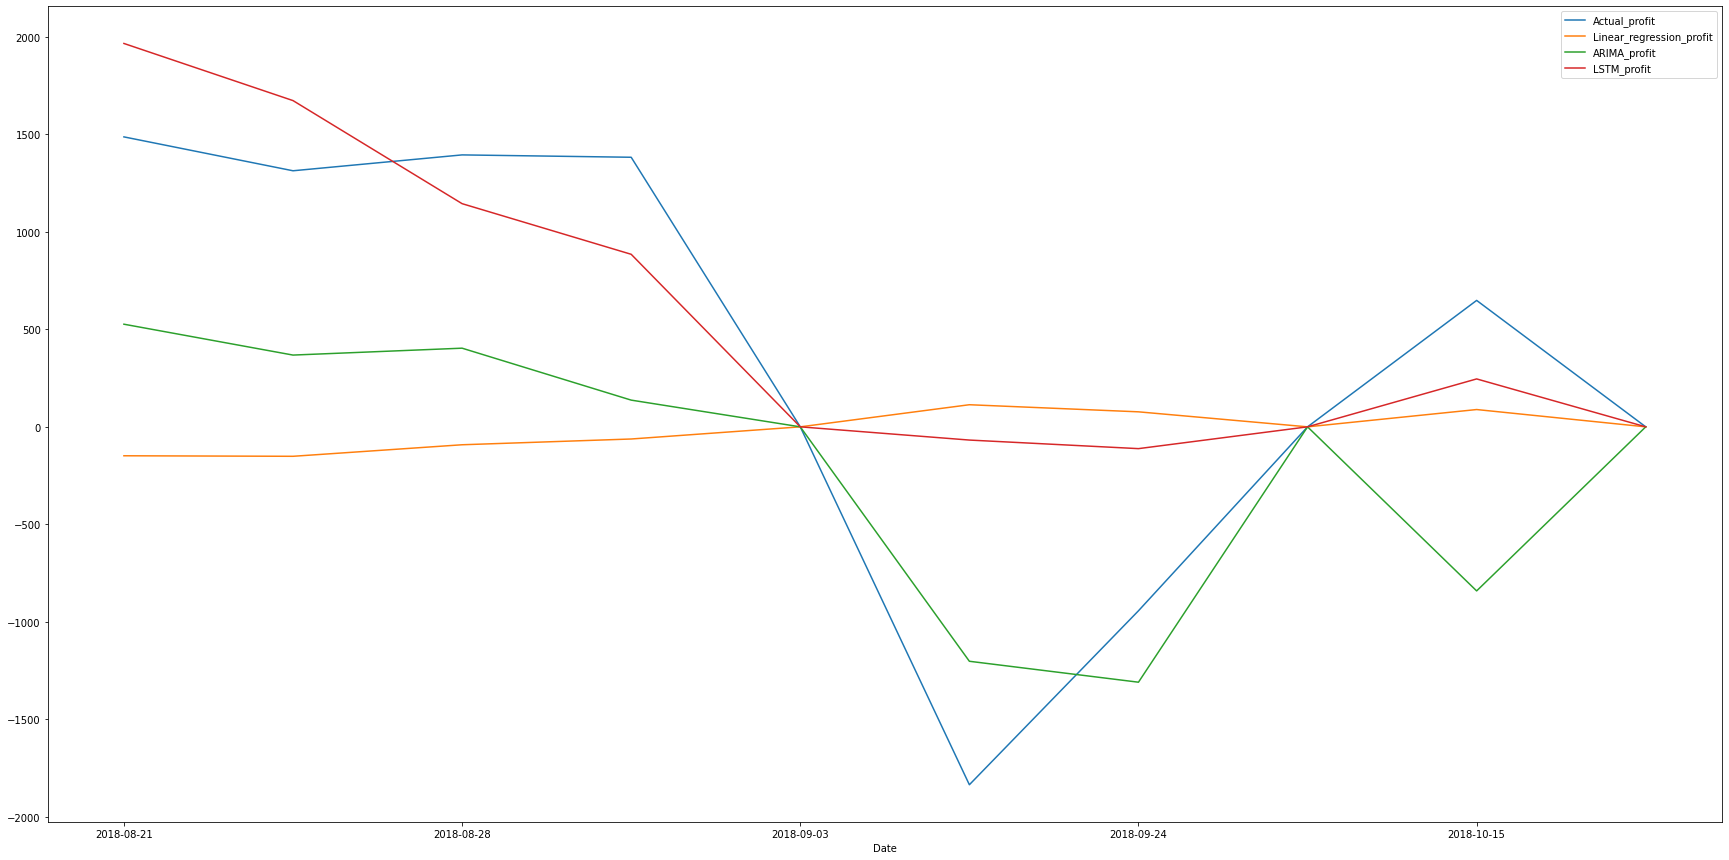

In [29]:
orders_predictions.plot(x='Date', y=['Actual_profit', 'Linear_regression_profit', 'ARIMA_profit', 'LSTM_profit'], figsize=(30,15))

__In the figure above:__
- __x-axis__ - Date
- __y-axis__ - Profit
- __Blue line__ - Actual profit
- __Orange line__ - Linear Regression predicted profit
- __Green line__ - ARIMA predicted profit
- __Red line__ - LSTM predicted profit

---